<a href="https://colab.research.google.com/github/CassDabii/NN-Stock-Price-Predictior/blob/main/NNSPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEURAL NETWORK STOCK PRICE PREDICTOR USING AN OSEMN METHODOLGY WITH REFERNECE TO AGILE**

### **IMPORTS**


In [15]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler



### #**OBTAINING DATA**

Loading the data using the yahoo finace data (talk about why you used this instead of a normal CSV file

In [ ]:
start_date = dt.datetime(2011,1,1)
end_date = dt.datetime(2021,1,1)

stockdata = yf.download('AAPL', start_date, 
                      end_date, 
                      progress=False,
)
stockdata = stockdata.pop('Close')
stockdata.describe()

### **SCRUBBING DATA**

Checking for missing fields in the data

In [3]:
missing_data = False

if np.mean(stockdata) != np.nanmean(stockdata):
  missing_data = True
  stockdata_appl_close = [~np.isnan(stockdata_appl_close)]
  print('There is missing data')
else:
  missing_data = False
  print('There are no missing fields')
  
  

There are no missing fields


Plotting close Prices of the stock (not specifying since the next section will be for choosing the stocks I want to predict) and as you can see there is a clear trend so we will have to make this stationary but we still have to test it.

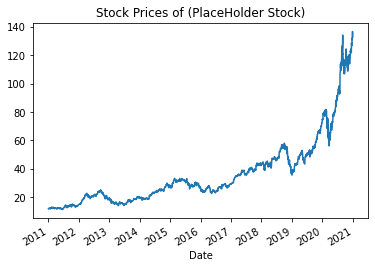

In [4]:
plt.title('Stock Prices of (PlaceHolder Stock)')
stockdata.plot()

### **EXPLORE DATA**

Testing how stationary the data is using the Dickey Fuller test. With this test there are 2 theories the Null Hypotheseis whereby the given time series is non stationary by nature and the second theory (Alternate Hypothesis in ADF test) is its contrary say that the time series data is stationary by nature. We know either to accept or reject the hypothesis if the ADF statistic < Critical value you reject the null hypothesis and if not you do not.

In [7]:
stationary_test = stockdata_stationary_diff.dropna().values
result = adfuller(stationary_test)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.227308
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Making data Stationary 

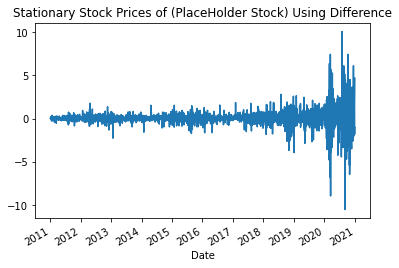

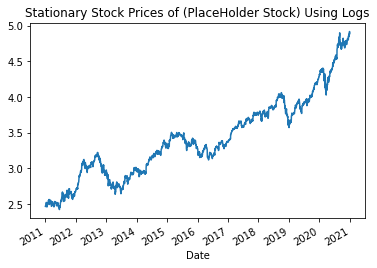

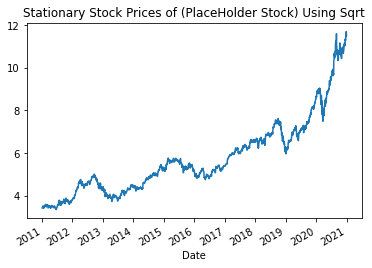

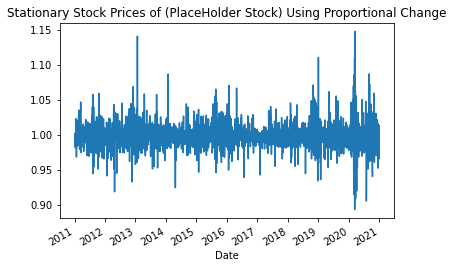

In [6]:
stockdata_stationary_diff = stockdata.diff().dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Difference')
stockdata_stationary_diff.plot()

plt.figure()
stockdata_stationary_log = np.log(stockdata).dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Logs')
stockdata_stationary_log.plot()

plt.figure()
stockdata_stationary_sqrt = np.sqrt(stockdata).dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Sqrt')
stockdata_stationary_sqrt.plot()

plt.figure()
stockdata_stationary_propchange = stockdata.shift(1)/stockdata.dropna()
stockdata_stationary_propchange = stockdata_stationary_propchange.dropna()
plt.title('Stationary Stock Prices of (PlaceHolder Stock) Using Proportional Change')
stockdata_stationary_propchange.plot()

**Although this is in the exploration phase we still will use the data from the exploration to prepare the data for the NN construction**

Dividing the data into the sections that will be used to train the NN and the section that will test the accuracy of the NN with out of sample data.


In [8]:
training = pd.DataFrame(stockdata_stationary_propchange[0:int(len(stockdata_stationary_propchange)*0.75)])
testing = pd.DataFrame(stockdata_stationary_propchange[int(len(stockdata_stationary_propchange)*0.75): int(len(stockdata_stationary_propchange))])


(1887, 1)
(629, 1)


Normalizing the data (talk about min max scaling and how not doing it may creat a bias)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
training_arr = scaler.fit_transform(training)



initalise x and y_train variable x being the number of previous datapoints it will use to cast the prediction and y being the prediction using the amount of previous days assigned. x and y train are then converted into numPy arrays instead of normal python list since it works better with tensorflow since we get operations regarding ammending vectors and matracies 

In [14]:
x_train, y_train = [],[]
prev_days = 10

for i in range(prev_days, training_arr.shape[0]):
  x_train.append(training_arr[i-prev_days: i])
  y_train.append(training_arr[i,0])

x_train, y_train = np.array(x_train) , np.array(x_train)

### **MODEL DATA**